In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [3]:
import pandas as pd

y['income'] = y['income'].str.strip('.')

#y.loc[:, 'income'] = y['income'].replace({'<=50K': 0, '>50K': 1})

<ipython-input-3-86adfe0213a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].str.strip('.')


In [4]:
df = pd.concat([X, y], axis=1)

#print(df)

print(df.describe)

<bound method NDFrame.describe of        age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial 

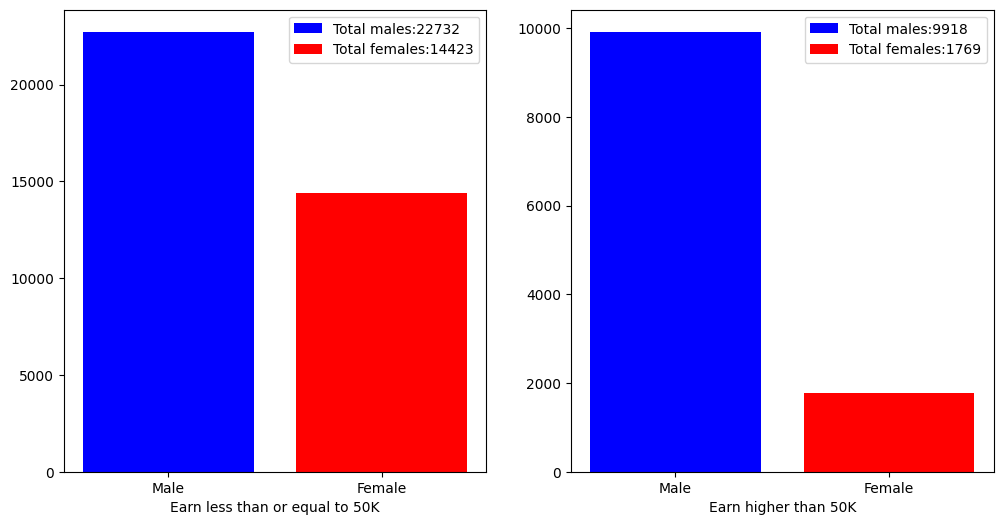

In [5]:
from matplotlib import pyplot as plt

low_income = df[df['income'] == '<=50K']
high_income = df[df['income'] == '>50K']

sex_difference_lesser = low_income['sex'].value_counts()
sex_difference_higher = high_income['sex'].value_counts()

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,6))

ax1.bar(sex_difference_lesser.index, sex_difference_lesser.values, label = [f'Total males:{sex_difference_lesser[0]}', f'Total females:{sex_difference_lesser[1]}'], color = ['blue', 'red'])
ax1.set_xlabel('Earn less than or equal to 50K')
ax2.bar(sex_difference_higher.index, sex_difference_higher.values, label = [f'Total males:{sex_difference_higher[0]}', f'Total females:{sex_difference_higher[1]}'], color = ['blue', 'red'])
ax2.set_xlabel('Earn higher than 50K')


ax1.legend()
ax2.legend()
plt.show()


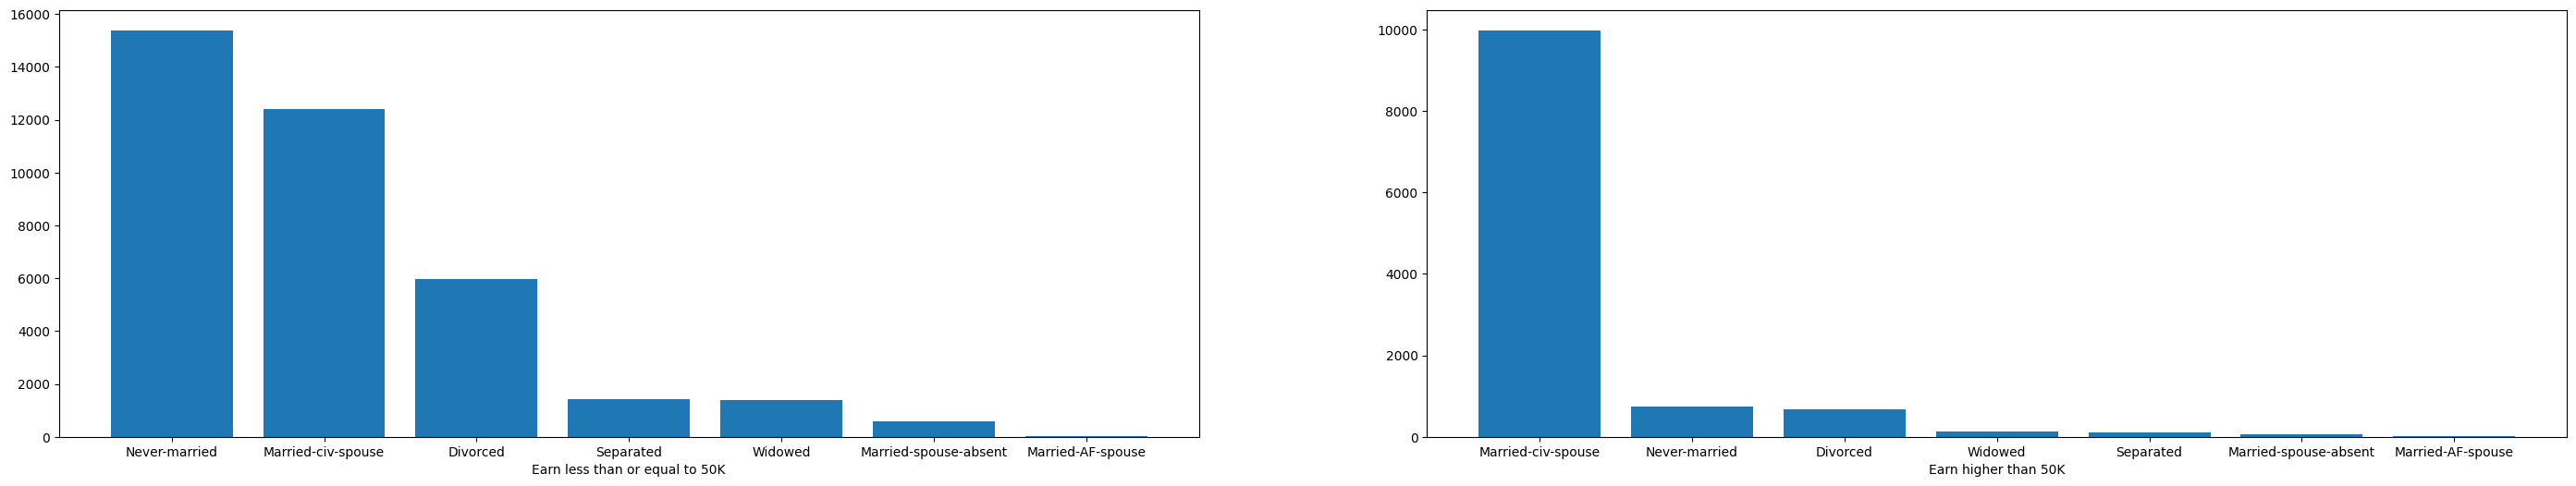

In [6]:
by_marital_status_lesser = low_income['marital-status'].value_counts()
by_marital_status_higher = high_income['marital-status'].value_counts()

fig, (ax3,ax4) = plt.subplots(1,2,figsize = [35,6])

ax3.bar(by_marital_status_lesser.index,by_marital_status_lesser.values)
ax4.bar(by_marital_status_higher.index,by_marital_status_higher.values)
ax3.set_xlabel('Earn less than or equal to 50K')
ax4.set_xlabel('Earn higher than 50K')

plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

# Assuming X is your original DataFrame
X_encoded = X.copy()

categorical_columns = []

for column in X.columns:
    if X[column].dtype == object:
        categorical_columns.append(column)

le = LabelEncoder()

for column in categorical_columns:
    X_encoded[column] = le.fit_transform(X_encoded[column])


In [8]:
y_encoded = y

y_encoded['income'] = le.fit_transform(y_encoded['income'])

y_encoded

<ipython-input-8-6b1d7fcfdc9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_encoded['income'] = le.fit_transform(y_encoded['income'])


,income
0,0
1,0
2,0
3,0
4,0
...,...
48837,0
48838,0
48839,0
48840,0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)


In [10]:
# Decision Tree is a good option for categorical classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

# We can easily train it with a 1000x12 X_train and get the results quite fast
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8094994369945747


In [11]:
# Let's drop column 3 to see what happens

X_encoded = X_encoded.drop('fnlwgt', axis=1)

X_encoded

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,9,13,2,4,0,4,1,0,0,13,39
2,38,4,11,9,0,6,1,4,1,0,0,40,39
3,53,4,1,7,2,6,0,2,1,0,0,40,39
4,28,4,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,4,9,13,0,10,1,4,0,0,0,36,39
48838,64,9,11,9,6,15,2,2,1,0,0,40,39
48839,38,4,9,13,2,10,0,4,1,0,0,50,39
48840,44,4,9,13,0,1,3,1,1,5455,0,40,39


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

accuracies = []
estimators = [10, (X_train.shape[1]), 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
depths = [5, 10, 15, 20, 25, 30]
best_rfclassifier = None
best_accuracy = 0
best_depth = 0
best_estimator = 0

for num in estimators:
  for depth in depths:
    rf_classifier = RandomForestClassifier(n_estimators=num, max_depth=depth, random_state=42)
    rf_classifier.fit(X_train,  np.ravel(y_train))
    y_pred_rf = rf_classifier.predict(X_test)
    accuracy_rf = accuracy_score(y_test,  np.ravel(y_pred_rf))
    accuracies.append(accuracy_rf)
    if accuracy_rf > best_accuracy:
      best_accuracy = accuracy_rf
      best_rfclassifier = rf_classifier
      best_depth = depth
      best_estimator = num

rf_classifier = best_rfclassifier
max_accuracy = max(accuracies)
pos = accuracies.index(max_accuracy)


0.8621148531067663
90
15


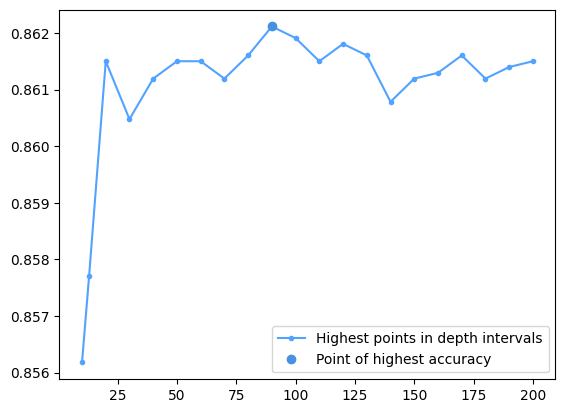

In [14]:
import math

pos = accuracies.index(max_accuracy)
highests = []
for i in range(int(len(accuracies)/len(depths))):
  highests.append(max(accuracies[i*len(depths):(i*len(depths) + len(depths) - 1)]))

pos = math.floor(pos/6)

plt.plot(estimators, highests, color='#52A3FF', marker = '.', label = 'Highest points in depth intervals')
plt.plot(estimators[pos], max_accuracy, 'o', color = '#4890E1', label = 'Point of highest accuracy')

print(max_accuracy)
print(estimators[pos])
print(best_depth)

plt.legend()
plt.show()

In [15]:
#Let's see what we get in metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_matrix = confusion_matrix(y_test, y_pred_rf)

print(conf_matrix)
print(classification_report(y_test, y_pred_rf))


[[6880  534]
 [ 917 1438]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7414
           1       0.73      0.61      0.66      2355

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769

